# New York City Housing Linear Regression

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

## Data preprocessing

In [2]:
# read .csv file into a dataframe
data = pd.read_csv('https://raw.githubusercontent.com/annie-jiang/ny-housing-regression/main/nyhousing.csv')

In [3]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
data.shape

(4801, 17)

In [5]:
data.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [7]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [8]:
# separate the city from the state column
data['CITY'] = data['STATE'].str.split(',').str[0]

# replace all instances of New York in the city column with manhattan
data['CITY'] = data['CITY'].replace({'New York': 'Manhattan'})

# drop rows where the city isn't in the five boroughs
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

data = data[data['CITY'].isin(boroughs)]

In [9]:
# keep the main types of property
property_types = ['Condo for sale','Co-op for sale','House for sale','Multi-family home for sale','Townhouse for sale','Land for sale']
data = data[data['TYPE'].isin(property_types)]

In [10]:
# fix the price of 2 E 55th St Unit 803, since it was listed for $350,000, not $2 billion
data['PRICE'] = data['PRICE'].replace(2147483647, 350000)

In [11]:
# remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers from the price column
data = remove_outliers(data, 'PRICE')

In [12]:
# drop unneeded columns
data = data.drop(columns=['BROKERTITLE','ADMINISTRATIVE_AREA_LEVEL_2','LONG_NAME','ADDRESS','FORMATTED_ADDRESS','MAIN_ADDRESS','LOCALITY','SUBLOCALITY','STREET_NAME','STATE','LATITUDE','LONGITUDE'])

In [13]:
data.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY
0,Condo for sale,315000,2,2.0,1400.000000,Manhattan
2,House for sale,260000,4,2.0,2015.000000,Staten Island
3,Condo for sale,69000,3,1.0,445.000000,Manhattan
5,House for sale,690000,5,2.0,4004.000000,Brooklyn
6,Condo for sale,899500,2,2.0,2184.207862,Manhattan


In [14]:
data.shape

(2915, 6)

## Data visualization

### Correlation matrix

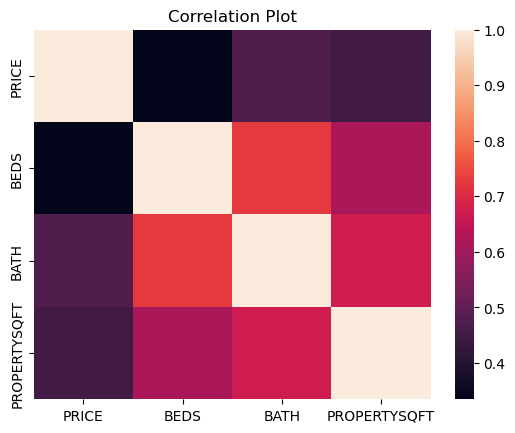

In [15]:
# identify the numerical columns
subset = data[['PRICE','BEDS','BATH','PROPERTYSQFT']]

sns.heatmap(subset.corr())
plt.title('Correlation Plot')
plt.show()

### Pairplot

C:\Users\annie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


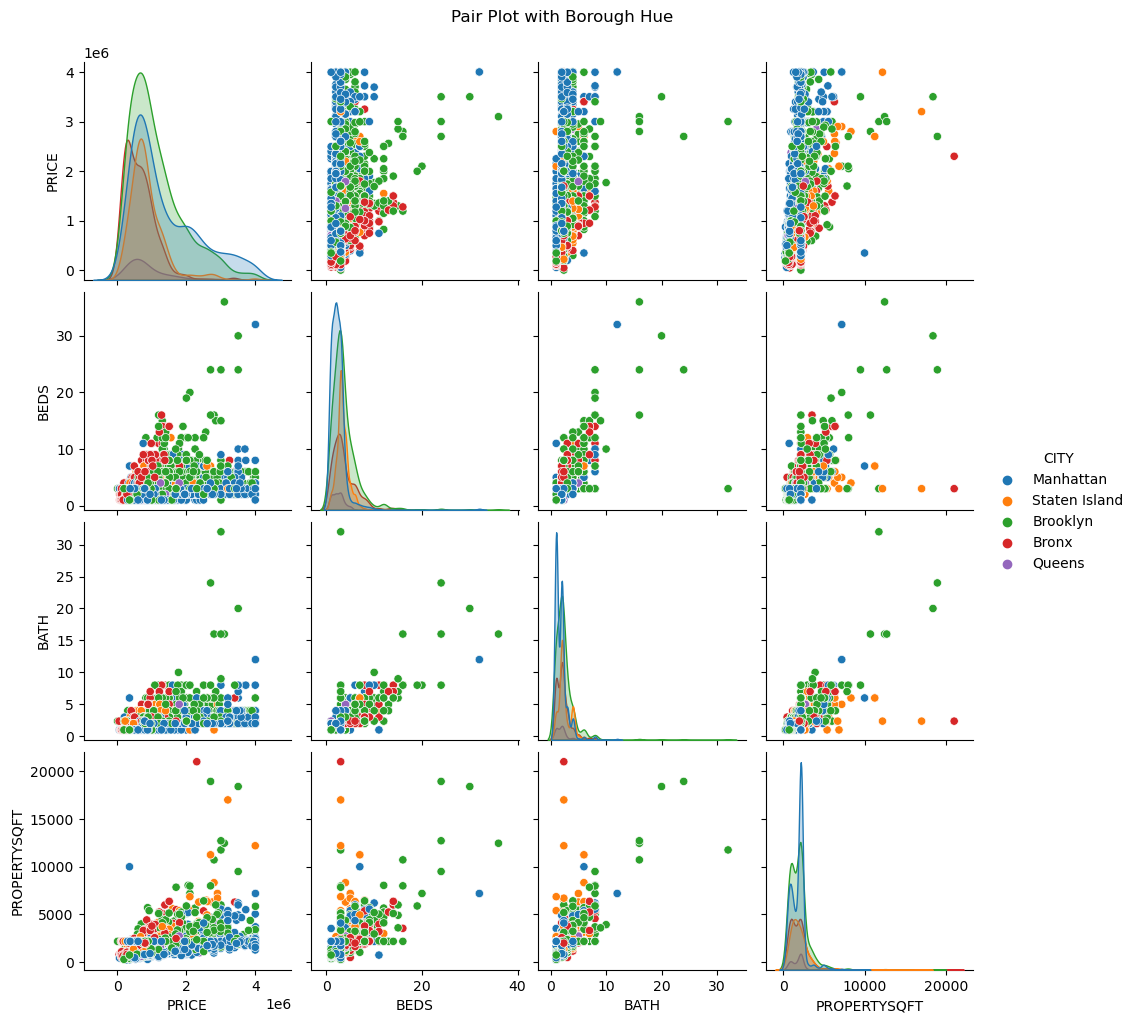

In [16]:
sns.pairplot(data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'CITY']], hue='CITY')
plt.suptitle('Pair Plot with Borough Hue', y=1.02)
plt.show()

### Price Distribution by Borough

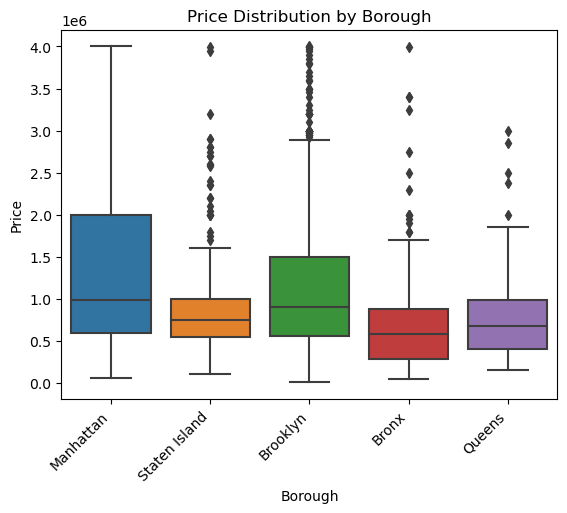

In [17]:
sns.boxplot(x='CITY', y='PRICE', data=data)
plt.title('Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

### Property Square Footage by Borough

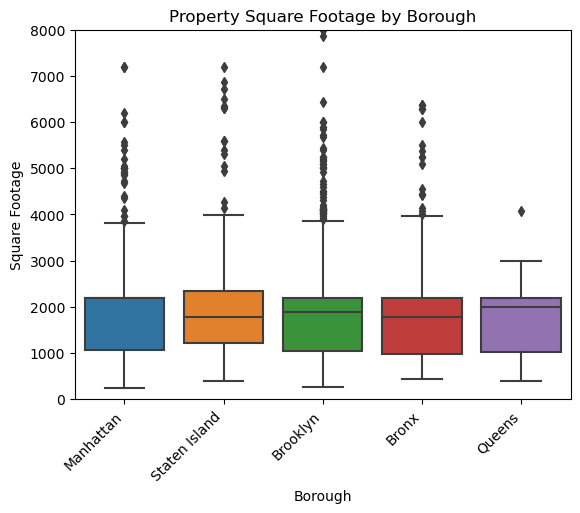

In [18]:
sns.boxplot(x='CITY', y='PROPERTYSQFT', data=data)
plt.title('Property Square Footage by Borough')
plt.ylim(0, 8000)
plt.xlabel('Borough')
plt.ylabel('Square Footage')
plt.xticks(rotation=45, ha='right')
plt.show()

## Prepare for linear regression

### Encode categorical columns

In [19]:
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['CITY', 'TYPE']

# fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_columns])

# convert encoded columns back to dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# reset index to ensure proper concatenation
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concatenate the encoded columns with the original dataframe
data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

C:\Users\annie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Standardize numerical columns

In [20]:
sc = StandardScaler()
numerical_columns = ['BEDS','BATH','PROPERTYSQFT']

scaled_data = sc.fit_transform(data[numerical_columns])

# convert standardized columns back to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# combine the scaled features with the original dataframe and drop the original numerical columns
data = data.drop(columns=numerical_columns).reset_index(drop=True)
data = pd.concat([data, scaled_df], axis=1)

### Split the dataset into training and test sets

In [21]:
# separate the features and labels
y = data[['PRICE']].values
x = data.drop(columns=['PRICE']).values

In [22]:
# use the ratio 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

## Fit the model on the training data

In [23]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [24]:
# make predictions on the test data
y_pred = lr.predict(x_test)

In [25]:
# calculate the coefficients
coefficients = lr.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [[ 2.50378295e+18  2.50378295e+18  2.50378295e+18  2.50378295e+18
   2.50378295e+18 -1.62557592e+18 -1.62557592e+18 -1.62557592e+18
  -1.62557592e+18 -1.62557592e+18 -1.62557592e+18 -1.84320000e+04
   2.42272000e+05  2.05568000e+05]]


In [26]:
# calculate the intercepts
intercept = lr.intercept_

print(f'Intercept: {intercept}')

Intercept: [-8.78207023e+17]


## Linear regression metrics

In [27]:
# calculate R squared
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.44818161034139903


In [28]:
# mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 375826254160.8834


In [29]:
# root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 613046.6981893658


In [30]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 421888.7074285714


## Export the model as pickle

In [31]:
with open('nychousing_prediction_model.pkl','wb') as f:
    pickle.dump(lr,f)
    
with open('nychousing_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)